In [1]:
import pandas as pd 
import numpy as np 
import requests
from tiingo import TiingoClient
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import pearsonr
from datetime import datetime

In [2]:
#Convert spread column to numeric values
treasury_spread = pd.read_csv('T10Y3M.csv')
treasury_spread = treasury_spread.rename(columns={"DATE": "date"})
treasury_spread['T10Y3M'] = treasury_spread['T10Y3M'].apply(pd.to_numeric, downcast='float', errors='coerce')
datestring = '00:00:00+00:00'
treasury_spread['date'] = treasury_spread['date'] + ' ' + datestring
treasury_spread['date'] = pd.to_datetime(treasury_spread['date'], format='%Y-%m-%d %H:%M:%S%z')
treasury_spread = treasury_spread.set_index('date')
treasury_spread.head(10)

,T10Y3M
date,
2000-06-02 00:00:00+00:00,0.28
2000-06-05 00:00:00+00:00,0.14
2000-06-06 00:00:00+00:00,0.15
2000-06-07 00:00:00+00:00,0.21
2000-06-08 00:00:00+00:00,0.22
2000-06-09 00:00:00+00:00,0.21
2000-06-12 00:00:00+00:00,0.16
2000-06-13 00:00:00+00:00,0.23
2000-06-14 00:00:00+00:00,0.24


In [3]:
#Install the client 
config = {}

config['session'] = True
config['api_key'] = ""
client = TiingoClient(config)

In [4]:
#Importing the ETFs 
spy_etf = client.get_dataframe('SPY',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')
iwm_etf = client.get_dataframe('IWM',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')

In [5]:
#Specifying ETF column names
spy_etf = spy_etf.add_prefix('spy_')
iwm_etf = iwm_etf.add_prefix('iwm_')


In [6]:
spy_etf.head()

,spy_close,spy_high,spy_low,spy_open,spy_volume,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,spy_adjVolume,spy_divCash,spy_splitFactor
date,,,,,,,,,,,,
2000-06-02 00:00:00+00:00,147.843704,149.093704,147.484299,148.937500,8962200,95.596796,96.405055,95.364402,96.304053,8962200,0.0,1.0
2000-06-05 00:00:00+00:00,147.125000,148.218704,146.875000,147.468704,6998100,95.132077,95.839274,94.970425,95.354319,6998100,0.0,1.0
2000-06-06 00:00:00+00:00,146.468704,147.781204,145.906204,146.625000,4858900,94.707711,95.556383,94.343995,94.808773,4858900,0.0,1.0
2000-06-07 00:00:00+00:00,147.484299,148.000000,146.000000,146.625000,4919500,95.364402,95.697858,94.404644,94.808773,4919500,0.0,1.0
2000-06-08 00:00:00+00:00,146.906204,147.750000,146.062500,147.500000,5723100,94.990602,95.536207,94.445057,95.374555,5723100,0.0,1.0


In [7]:
iwm_etf.head()

,iwm_close,iwm_high,iwm_low,iwm_open,iwm_volume,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,iwm_adjVolume,iwm_divCash,iwm_splitFactor
date,,,,,,,,,,,,
2000-06-02 00:00:00+00:00,102.4,102.4,101.7,101.7,14700,37.544774,37.544774,37.288120,37.288120,29400,0.0,1.0
2000-06-05 00:00:00+00:00,102.0,103.1,101.9,102.1,24200,37.398115,37.801428,37.361450,37.434780,48400,0.0,1.0
2000-06-06 00:00:00+00:00,103.0,104.8,102.7,103.6,75900,37.764763,38.424730,37.654769,37.984752,151800,0.0,1.0
2000-06-07 00:00:00+00:00,103.1,103.1,101.4,102.4,65500,37.801428,37.801428,37.178126,37.544774,131000,0.0,1.0
2000-06-08 00:00:00+00:00,102.9,104.3,102.9,104.3,45700,37.728098,38.241406,37.728098,38.241406,91400,0.0,1.0


In [8]:
#Combining dataframes
spy_iwm_pair = pd.concat([spy_etf, iwm_etf], axis=1)
spy_iwm_pair = pd.merge(spy_iwm_pair, treasury_spread, left_index=True, right_index=True, how='left')
spy_iwm_pair.index = spy_iwm_pair.index.tz_convert(None)
spy_iwm_pair.head()

,spy_close,spy_high,spy_low,spy_open,spy_volume,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,spy_adjVolume,...,iwm_open,iwm_volume,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,iwm_adjVolume,iwm_divCash,iwm_splitFactor,T10Y3M
date,,,,,,,,,,,,,,,,,,,,,
2000-06-02,147.843704,149.093704,147.484299,148.937500,8962200,95.596796,96.405055,95.364402,96.304053,8962200,...,101.7,14700,37.544774,37.544774,37.288120,37.288120,29400,0.0,1.0,0.28
2000-06-05,147.125000,148.218704,146.875000,147.468704,6998100,95.132077,95.839274,94.970425,95.354319,6998100,...,102.1,24200,37.398115,37.801428,37.361450,37.434780,48400,0.0,1.0,0.14
2000-06-06,146.468704,147.781204,145.906204,146.625000,4858900,94.707711,95.556383,94.343995,94.808773,4858900,...,103.6,75900,37.764763,38.424730,37.654769,37.984752,151800,0.0,1.0,0.15
2000-06-07,147.484299,148.000000,146.000000,146.625000,4919500,95.364402,95.697858,94.404644,94.808773,4919500,...,102.4,65500,37.801428,37.801428,37.178126,37.544774,131000,0.0,1.0,0.21
2000-06-08,146.906204,147.750000,146.062500,147.500000,5723100,94.990602,95.536207,94.445057,95.374555,5723100,...,104.3,45700,37.728098,38.241406,37.728098,38.241406,91400,0.0,1.0,0.22


In [9]:
len(spy_iwm_pair)

5932

In [10]:
#Dropping extraneous columns
def drop_cols(df, str1, str2):
    df = df.drop(columns=[str1+'_close', str1+'_high', str1+'_low', str1+'_open', str1+'_volume', str1+'_divCash', str1+'_splitFactor', str1+'_adjVolume',
                            str2+'_close', str2+'_high', str2+'_low', str2+'_open', str2+'_volume', str2+'_divCash', str2+'_splitFactor', str2+'_adjVolume'])
    return df
spy_iwm_pair = drop_cols(spy_iwm_pair, 'spy', 'iwm')

In [11]:
#Calculate Returns 
spy_iwm_pair['spy_daily_returns'] = ((spy_iwm_pair['spy_adjClose'] - spy_iwm_pair['spy_adjOpen']) / spy_iwm_pair['spy_adjOpen']) * 100
spy_iwm_pair['iwm_daily_returns'] = ((spy_iwm_pair['iwm_adjClose'] - spy_iwm_pair['iwm_adjOpen']) / spy_iwm_pair['iwm_adjOpen']) * 100
spy_iwm_pair['spy_iwm_return_spread'] = spy_iwm_pair['spy_daily_returns'] - spy_iwm_pair['iwm_daily_returns']
spy_iwm_pair

,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,T10Y3M,spy_daily_returns,iwm_daily_returns,spy_iwm_return_spread
date,,,,,,,,,,,,
2000-06-02,95.596796,96.405055,95.364402,96.304053,37.544774,37.544774,37.288120,37.288120,0.28,-0.734399,0.688299,-1.422698
2000-06-05,95.132077,95.839274,94.970425,95.354319,37.398115,37.801428,37.361450,37.434780,0.14,-0.233069,-0.097943,-0.135126
2000-06-06,94.707711,95.556383,94.343995,94.808773,37.764763,38.424730,37.654769,37.984752,0.15,-0.106596,-0.579151,0.472555
2000-06-07,95.364402,95.697858,94.404644,94.808773,37.801428,37.801428,37.178126,37.544774,0.21,0.586052,0.683594,-0.097542
2000-06-08,94.990602,95.536207,94.445057,95.374555,37.728098,38.241406,37.728098,38.241406,0.22,-0.402574,-1.342282,0.939708
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,473.650000,475.380000,471.700000,473.860000,201.480000,202.810000,200.190000,200.880000,-1.54,-0.044317,0.298686,-0.343003
2023-12-26,475.650000,476.580000,473.990000,474.070000,204.100000,204.560000,201.690000,202.210000,-1.56,0.333284,0.934672,-0.601388
2023-12-27,476.510000,476.660000,474.890000,475.440000,204.820000,205.490000,203.395000,204.440000,-1.65,0.225055,0.185874,0.039181


In [12]:
#Create trailing volatility and future volatility columns
spy_iwm_pair['spy_30_day_vol_trail'] = np.sqrt(np.log(spy_iwm_pair['spy_adjClose']).diff().rolling(30).var()*252)
spy_iwm_pair['iwm_30_day_vol_trail'] = np.sqrt(np.log(spy_iwm_pair['iwm_adjClose']).diff().rolling(30).var()*252)
spy_iwm_pair['spy_30_day_vol_future'] = spy_iwm_pair['spy_30_day_vol_trail'].shift(-30)
spy_iwm_pair['iwm_30_day_vol_future'] = spy_iwm_pair['iwm_30_day_vol_trail'].shift(-30)
spy_iwm_pair = spy_iwm_pair.fillna(method='ffill')
spy_iwm_pair

,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,T10Y3M,spy_daily_returns,iwm_daily_returns,spy_iwm_return_spread,spy_30_day_vol_trail,iwm_30_day_vol_trail,spy_30_day_vol_future,iwm_30_day_vol_future
date,,,,,,,,,,,,,,,,
2000-06-02,95.596796,96.405055,95.364402,96.304053,37.544774,37.544774,37.288120,37.288120,0.28,-0.734399,0.688299,-1.422698,NaN,NaN,0.147685,0.217855
2000-06-05,95.132077,95.839274,94.970425,95.354319,37.398115,37.801428,37.361450,37.434780,0.14,-0.233069,-0.097943,-0.135126,NaN,NaN,0.149105,0.224632
2000-06-06,94.707711,95.556383,94.343995,94.808773,37.764763,38.424730,37.654769,37.984752,0.15,-0.106596,-0.579151,0.472555,NaN,NaN,0.150539,0.229534
2000-06-07,95.364402,95.697858,94.404644,94.808773,37.801428,37.801428,37.178126,37.544774,0.21,0.586052,0.683594,-0.097542,NaN,NaN,0.154335,0.233760
2000-06-08,94.990602,95.536207,94.445057,95.374555,37.728098,38.241406,37.728098,38.241406,0.22,-0.402574,-1.342282,0.939708,NaN,NaN,0.164918,0.248073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,473.650000,475.380000,471.700000,473.860000,201.480000,202.810000,200.190000,200.880000,-1.54,-0.044317,0.298686,-0.343003,0.101372,0.244661,0.081321,0.210428
2023-12-26,475.650000,476.580000,473.990000,474.070000,204.100000,204.560000,201.690000,202.210000,-1.56,0.333284,0.934672,-0.601388,0.094393,0.245023,0.081321,0.210428
2023-12-27,476.510000,476.660000,474.890000,475.440000,204.820000,205.490000,203.395000,204.440000,-1.65,0.225055,0.185874,0.039181,0.093805,0.244516,0.081321,0.210428


In [13]:
#Split dataframes from 2000-2012 to 2012-current
split_date = pd.to_datetime('2012-01-01')
spy_iwm_pair_2000_2012 = spy_iwm_pair.loc[spy_iwm_pair.index <= split_date]
spy_iwm_pair_2012_2023 = spy_iwm_pair.loc[spy_iwm_pair.index > split_date]

In [14]:
spy_iwm_pair_2000_2012['spy_30_day_vol_future'].value_counts()

0.147685    1
0.240850    1
0.261482    1
0.261447    1
0.260171    1
           ..
0.121328    1
0.122881    1
0.118024    1
0.126250    1
0.087918    1
Name: spy_30_day_vol_future, Length: 2914, dtype: int64

In [35]:
def make_scatter(df, x, y, days_shift):
    slope, intercept = np.polyfit(df[x][::days_shift], df[y][::days_shift], 1)
    corr = pearsonr(df[x][::days_shift], df[y][::days_shift])
    first_index, last_index = df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d')
    plt.title(f'{first_index} to {last_index}, pearson coeffiecient {corr[0]:.4f}')
    plt.scatter(df[x][::days_shift], df[y][::days_shift], label = 'DataPoints')
    plt.plot(df[x][::days_shift], slope * df[x][::days_shift] + intercept, color='red', label='Regression line')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

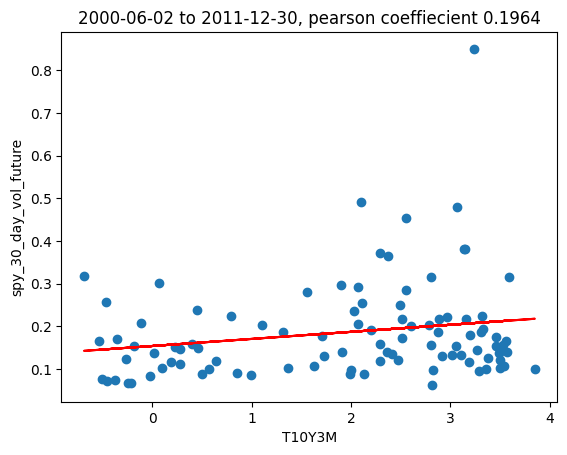

In [36]:
columns = ['T10Y3M', 'spy_30_day_vol_future', ]
make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', 'spy_30_day_vol_future', 30)


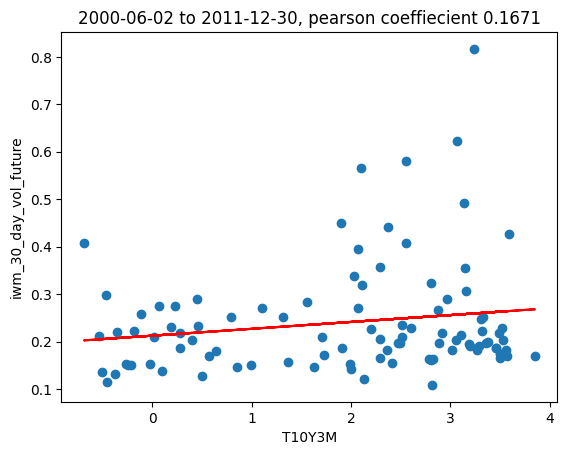

In [37]:
make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', 'iwm_30_day_vol_future', 30)

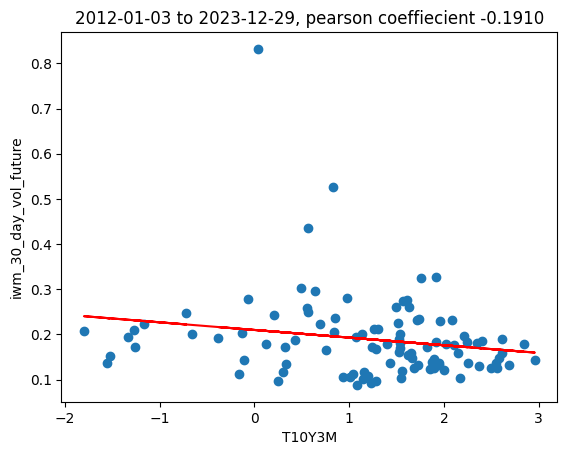

In [38]:
make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', 'iwm_30_day_vol_future', 30)

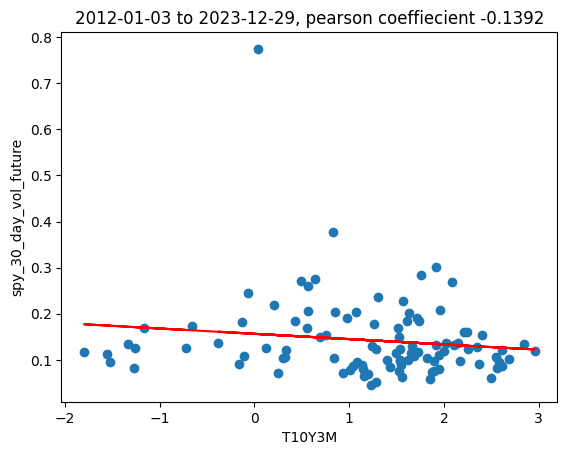

In [39]:
make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', 'spy_30_day_vol_future', 30)